In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading train and test data
train_data=pd.read_excel(r"E:\Project\doctor_prediction_train.xlsx",sep=",\S")
test_data=pd.read_excel(r"E:\Project\Doctor_prediction_test.xlsx")

In [3]:
#seeing rows of training data
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
#seeing a test data
test_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [5]:
print(train_data.shape)
print(test_data.shape)

(5961, 7)
(1987, 6)


# Train Data

In [6]:
train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [7]:
#checking null values
train_data.isnull().values.any()

True

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 186.3+ KB


In [9]:
#imputing missing value withy mode as it is categorical data
for col in ["Rating","Place","Miscellaneous_Info"]:
    train_data[col].fillna(train_data[col].mode()[0],inplace=True)

In [10]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


# EDA

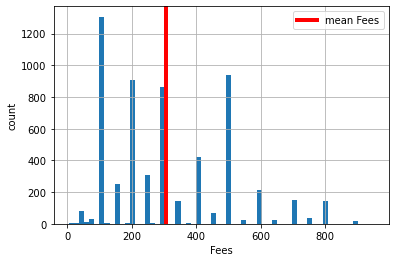

In [11]:
Fees=train_data["Fees"].hist(bins=60)
mean_val=np.mean(train_data["Fees"])
plt.axvline(mean_val,linewidth=4,color="red",label="mean Fees")
plt.xlabel("Fees")
plt.ylabel("count")
plt.legend()
plt.show()

# Exploring data Variable

In [12]:
for column in train_data.columns:
    if train_data[column].dtypes==object:
        print(str(column)+ " : "+str(train_data[column].unique()))
        print(train_data[column].value_counts())
        print("**********************************************************************************************")
        print("/n")

Qualification : ['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                   488
BHMS                                                                  477
BAMS                                                                  471
MBBS                                                                  334
MBBS, MS - ENT                                                        220
                                                                     ... 
MD - Physician, Post Graduate Diploma in Clinical Research (PGDCR)      1
BHMS, MD - Homeopathy, Diploma in Hospital Administration               1
MD - Anaesthesiology, Diploma in Anesthesiology, M

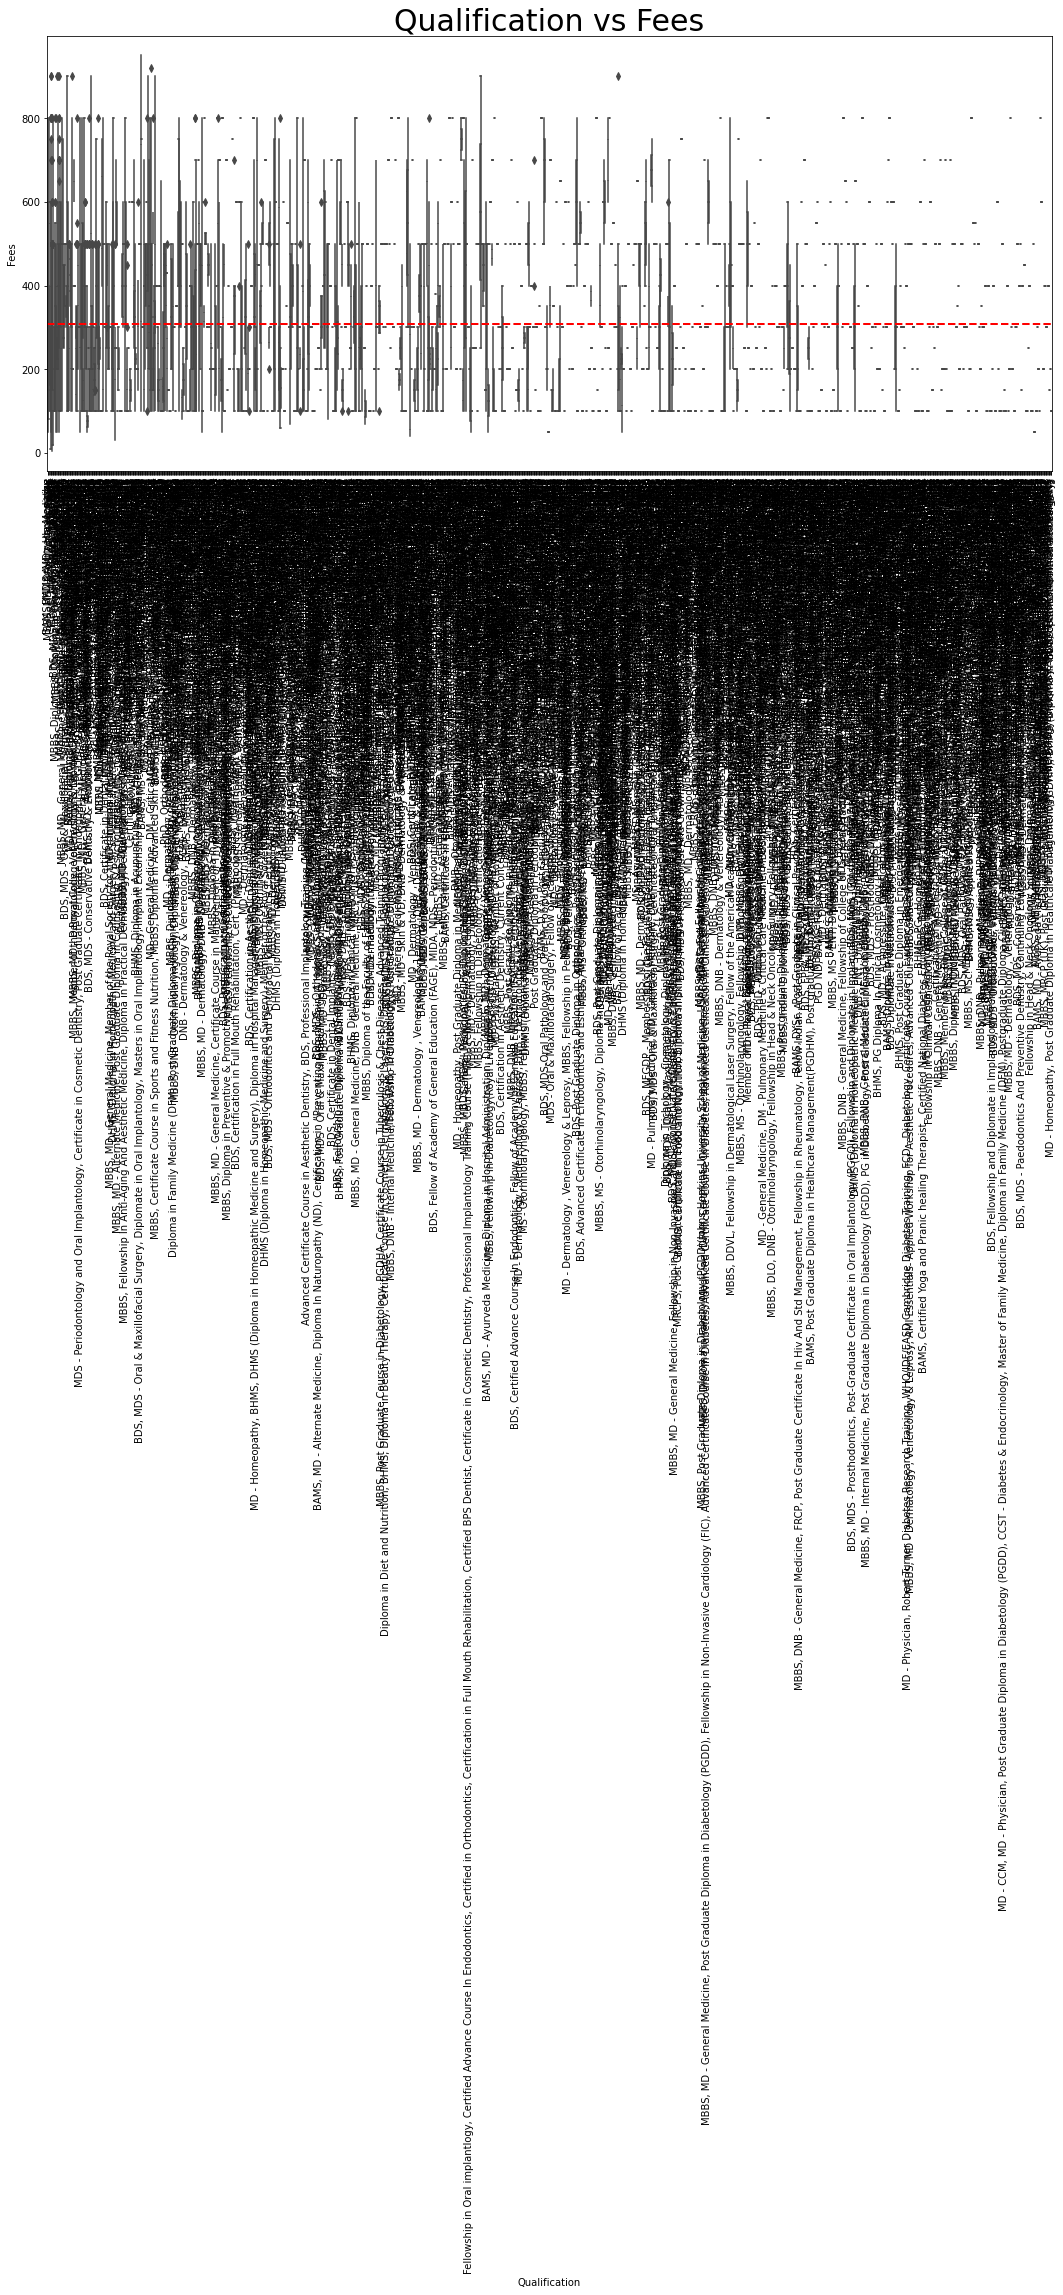

In [13]:
#qualifiaction vs fees
plt.figure(figsize=(18,8))
mean_fees=np.mean(train_data["Fees"])
sns.boxplot(y="Fees",x="Qualification",data=train_data,palette="rainbow")
plt.axhline(mean_fees,color="r",linestyle="dashed",linewidth=2)
plt.title("Qualification vs Fees",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

In [14]:
print(train_data["Qualification"].value_counts())

BDS                                                                   488
BHMS                                                                  477
BAMS                                                                  471
MBBS                                                                  334
MBBS, MS - ENT                                                        220
                                                                     ... 
MD - Physician, Post Graduate Diploma in Clinical Research (PGDCR)      1
BHMS, MD - Homeopathy, Diploma in Hospital Administration               1
MD - Anaesthesiology, Diploma in Anesthesiology, MBBS                   1
MD AYURVED AND YOG, BAMS                                                1
MBBS, MD - Dermatology, Post MD SR AIIMS                                1
Name: Qualification, Length: 1420, dtype: int64


In [15]:
print(train_data["Experience"].value_counts())

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
64 years experience      1
65 years experience      1
66 years experience      1
59 years experience      1
61 years experience      1
Name: Experience, Length: 64, dtype: int64


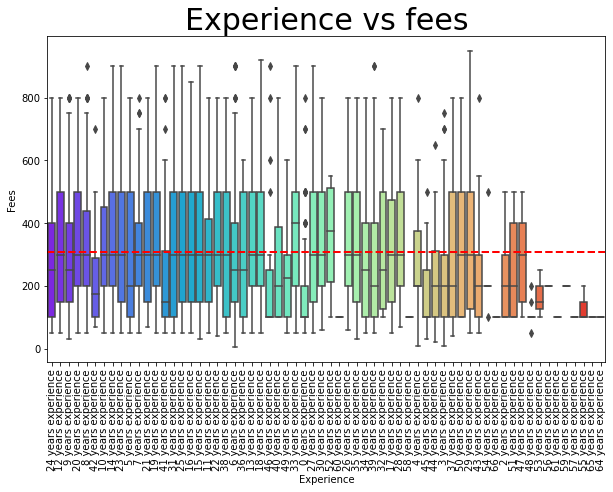

In [16]:
plt.figure(figsize=(10,6))
mean_fees=np.mean(train_data["Fees"])
sns.boxplot(x="Experience",y="Fees",data=train_data,palette="rainbow")
plt.axhline(mean_fees,color="r",linestyle="dashed",linewidth=2)
plt.title("Experience vs fees",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

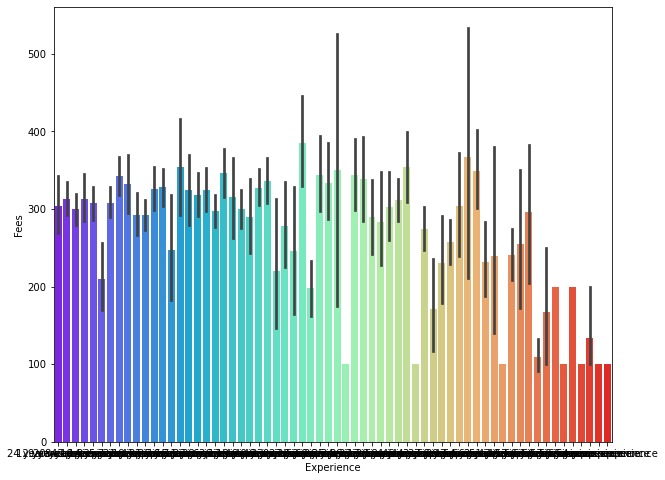

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x="Experience",y="Fees",data=train_data,palette="rainbow")
plt.xticks(rotation=0)
plt.show()

In [18]:
print(train_data["Fees"].value_counts())

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [19]:
print(train_data["Rating"].value_counts())

100%    3986
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
90%       66
92%       66
91%       60
89%       42
88%       41
85%       27
82%       23
86%       21
83%       21
80%       19
77%       16
87%       14
84%       13
79%       13
67%       12
81%       12
71%        9
76%        9
73%        8
75%        8
74%        7
60%        7
78%        6
56%        5
68%        5
70%        4
69%        4
57%        3
72%        3
62%        2
33%        2
64%        2
63%        2
55%        2
48%        1
65%        1
47%        1
58%        1
36%        1
45%        1
7%         1
40%        1
53%        1
Name: Rating, dtype: int64


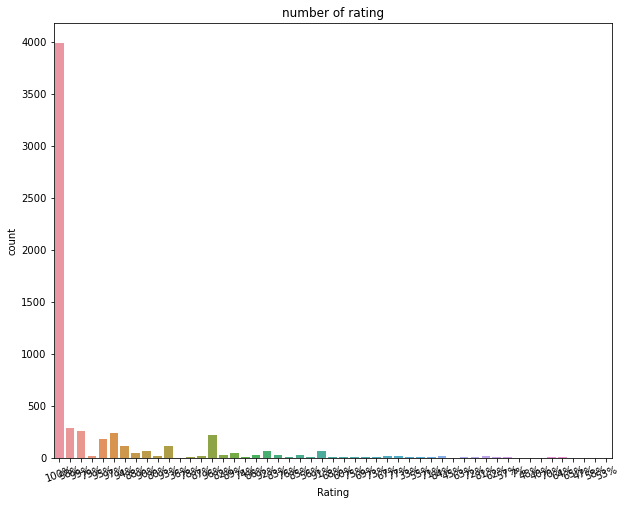

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x="Rating",data=train_data)
plt.title("number of rating")
plt.xticks(rotation=20)
plt.show()

In [21]:
print(train_data["Place"].value_counts())

HSR Layout, Bangalore                100
Andheri West, Mumbai                  70
Dwarka, Delhi                         67
Banjara Hills, Hyderabad              64
Mulund West, Mumbai                   54
                                    ... 
Balaramapuram, Thiruvananthapuram      1
Indirapuram, Delhi                     1
VV Puram, Bangalore                    1
Perungalathur, Chennai                 1
Jeevan Park, Delhi                     1
Name: Place, Length: 877, dtype: int64


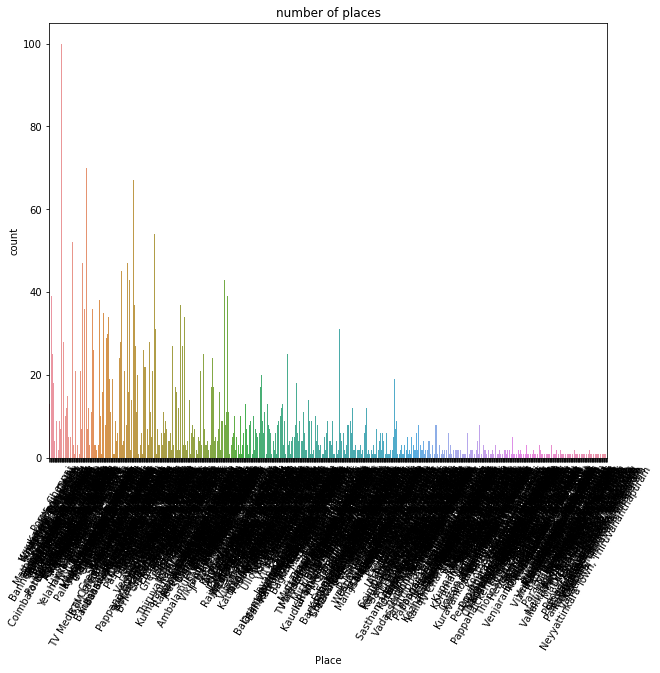

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="Place",data=train_data)
plt.title("number of places")
plt.xticks(rotation=60)
plt.show()

# Now Handaling Categorical data

In [23]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data["Qualification"]=le.fit_transform(train_data["Qualification"])

In [25]:
le=LabelEncoder()
train_data["Rating"]=le.fit_transform(train_data["Rating"])
train_data["Rating"]

0        0
1       49
2        0
3        0
4        0
        ..
5956    49
5957     0
5958    48
5959    41
5960     0
Name: Rating, Length: 5961, dtype: int32

In [26]:
train_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,24 years experience,0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,73,12 years experience,49,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,1135,9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,464,12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,10,20 years experience,0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,1075,19 years experience,49,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,596,33 years experience,0,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100
5958,596,41 years experience,48,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,943,15 years experience,41,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [27]:
Profile=train_data["Profile"]
Profile=pd.get_dummies(Profile,drop_first=True)

In [28]:
#i will drop palce and miscellaneous value
train_data.drop(["Miscellaneous_Info","Place"],axis=1,inplace=True)

In [29]:
train=pd.concat([train_data,Profile],axis=1)

In [30]:
train

,Qualification,Experience,Rating,Profile,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,401,24 years experience,0,Homeopath,100,0,0,0,0,1
1,73,12 years experience,49,Ayurveda,350,0,0,0,0,0
2,1135,9 years experience,0,ENT Specialist,300,0,0,1,0,0
3,464,12 years experience,0,Ayurveda,250,0,0,0,0,0
4,10,20 years experience,0,Ayurveda,250,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5956,1075,19 years experience,49,ENT Specialist,300,0,0,1,0,0
5957,596,33 years experience,0,General Medicine,100,0,0,0,1,0
5958,596,41 years experience,48,General Medicine,600,0,0,0,1,0
5959,943,15 years experience,41,General Medicine,100,0,0,0,1,0


In [31]:
#i will drop profile it is no use
train.drop(["Profile"],axis=1,inplace=True)

In [32]:
train.shape

(5961, 9)

# Now all column are in numeric data ,now some steps are follow in test data

# Test Data

In [33]:
#preprocessing
print("columns")
print("*"*85)
print(test_data.columns)
print("\n")

print("test info")
print("*"*85)
print(test_data.info())
print("\n")

print("null values")
print("*"*85)
print(test_data.isnull().sum())
print("\n")







columns
*************************************************************************************
Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')


test info
*************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 46.6+ KB
None


null values
*************************************************************************************
Qualification            0
Experience               

In [34]:
test_data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [35]:
le=LabelEncoder()
train_data["Rating"]=le.fit_transform(train_data["Rating"])
train_data["Rating"]

0        0
1       49
2        0
3        0
4        0
        ..
5956    49
5957     0
5958    48
5959    41
5960     0
Name: Rating, Length: 5961, dtype: int32

In [36]:
Profile=test_data["Profile"]
Profile=pd.get_dummies(Profile,drop_first=True)

In [37]:
test=pd.concat([test_data,Profile],axis=1)

In [38]:
print(train.shape)
print(test.shape)

(5961, 9)
(1987, 11)


# Now all column change into numeric type

In [39]:
train.describe()

,Qualification,Rating,Fees,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,14.534139,307.944640,0.234357,0.173461,0.122127,0.196779,0.141419
std,413.842446,21.137633,190.920373,0.423632,0.378677,0.327460,0.397597,0.348483
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,943.000000,42.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1419.000000,50.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation

In [40]:
corr=train.corr()

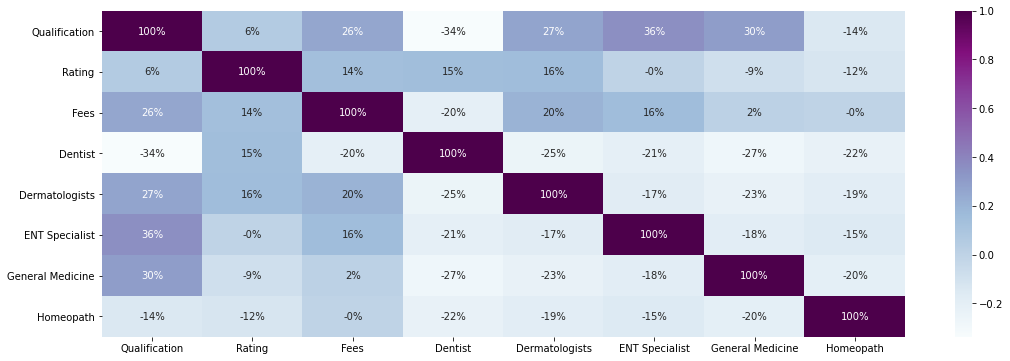

In [41]:
plt.figure(figsize=(18,6))
sns.heatmap(corr,annot=True,fmt=".0%",cmap="BuPu")


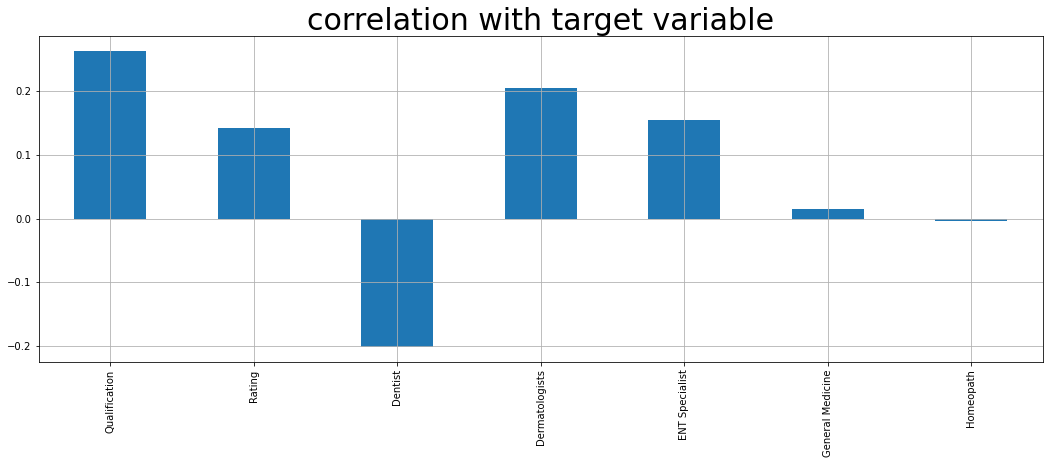

In [42]:
#correlation with target variable
plt.figure(figsize=(18,6))
train.drop("Fees",axis=1).corrwith(train["Fees"]).plot(kind="bar",grid=True)
plt.title("correlation with target variable",fontsize=30)
plt.xticks(rotation="vertical")
plt.show()

# Plotting Outliers:

Qualification          AxesSubplot(0.125,0.749828;0.168478x0.130172)
Rating              AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Fees                AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dentist             AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Dermatologists         AxesSubplot(0.125,0.593621;0.168478x0.130172)
ENT Specialist      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
General Medicine    AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Homeopath           AxesSubplot(0.731522,0.593621;0.168478x0.130172)
dtype: object

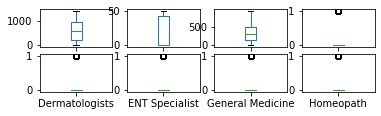

In [43]:
train.plot(kind="box",subplots=True,layout=(5,4))

# checking skewness

In [44]:
train.skew()

Qualification       0.239720
Rating              0.817666
Fees                0.751870
Dentist             1.254545
Dermatologists      1.725211
ENT Specialist      2.308676
General Medicine    1.525779
Homeopath           2.058645
dtype: float64

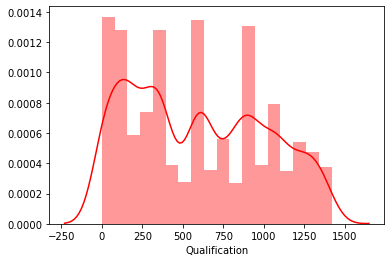

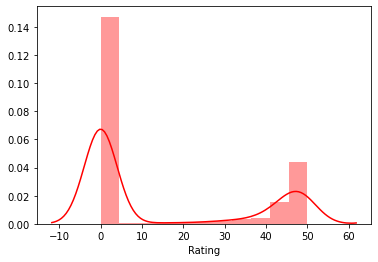

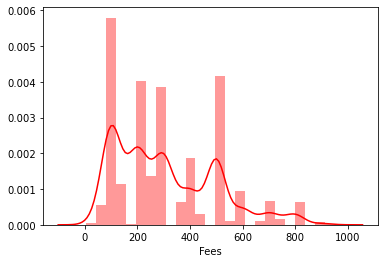

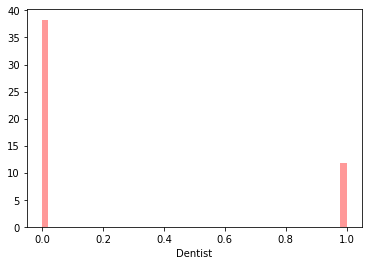

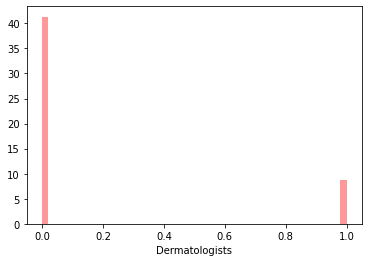

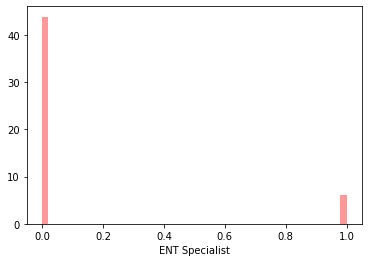

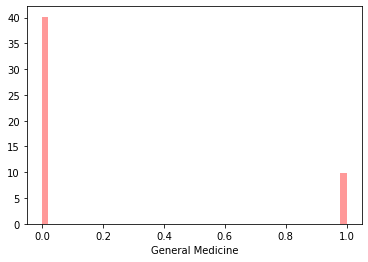

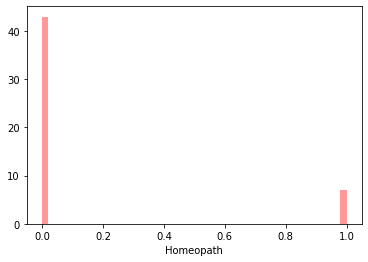

In [45]:
for col in train.describe().columns:
    sns.distplot(train[col],color="r")
    plt.show()

In [46]:
#removing skewness by sqrt and cbrt 
train.skew()
for col in train.skew().index:
    if col in train.describe().columns:
        if train[col].skew()>0.55:
            train[col]=np.sqrt(train[col])
        if train[col].skew()<-0.55:
            train[col]=np.cbrt(train[col])

# Remove outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
train_new=train[(z<3).all(axis=1)]
print(train_new.shape)

In [ ]:
train.shape

# we have remove outliers in train data now i will remove outlier and skweness from test data

In [ ]:
#removing skewness by sqrt and cbrt 
test.skew()
for col in test.skew().index:
    if col in test.describe().columns:
        if test[col].skew()>0.55:
            test[col]=np.sqrt(test[col])
        if test[col].skew()<-0.55:
            test[col]=np.cbrt(train[col])

In [ ]:
test

In [ ]:
test.drop(["Rating","Profile"],axis=1,inplace=True)

In [ ]:
#now test data is ready
z=np.abs(zscore(test))

In [ ]:
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
test_new=test[(z<3).all(axis=1)]

In [ ]:
print(train_new.shape)
print(test_new.shape)

# Feature selection

In [ ]:
x=train_new.drop(columns=["Fees"],axis=1)
y=train_new["Fees"]

# Now model is ready for training and testing

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
print(y_train.shape)
print(y_test.shape)

In [ ]:
#importing all library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#importing boosting library
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#importing metrics library
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
#all algorithm using loop
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Score of",m,"is:")
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RSME:",mean_squared_error(y_test,predm))
    print("R2_score:",r2_score(y_test,predm))
    print("**********************************************************************************************")
    print("/n")

In [ ]:
#cross val score for all algorithm
model=[LinearRegression(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor()]
for n in model:
    score=cross_val_score(n,x,y,cv=10,scoring="r2")
    print("Model",n)
    print("Score",score)
    print("MEAN:",score.mean())
    print("Standard Deviation:",score.std())
    print("**************************************************************************")
    print("/n")

# Gradient boosting best score with cross val score but i dont get best model we need more data to build model

In [ ]:
#using grid searchcv to find best parameter
from sklearn.model_selection import GridSearchCV
Parameters={"n_estimators":[200,400,500,700],"learning_rate":[0.1,0.2,0.3]}
grb=GradientBoostingRegressor()
clf=GridSearchCV(grb,Parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
grb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=200,random_state=47)
grb.fit(x_train,y_train)
print("Score:",grb.score(x_train,y_train))
predgrb=grb.predict(x_test)
print(mean_absolute_error(y_test,predgrb))
print(mean_squared_error(y_test,predgrb))
print(np.sqrt(mean_squared_error(y_test,predgrb)))
print("r2score:",r2_score(y_test,predgrb))

# now our score is increased

In [ ]:
sns.distplot(y_test-predgrb)

In [ ]:
plt.scatter(y_test,predgrb,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("predgrb")
plt.title("scatter plot between test and predicted data",fontsize=15)
plt.show()

In [ ]:
import pickle 

In [ ]:
filename="doctor_fees_prediction.pkl"
pickle.dump(grb,open(filename,"wb"))

In [ ]:
a=np.array(y_test)

In [ ]:
predicted=np.array(grb.predict(x_test))

In [ ]:
train_data=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [ ]:
train_data

# test data

In [ ]:
x=test.iloc[:,:]

In [ ]:
x

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
test=sc.fit_transform(test)

In [ ]:
Fittedmodel=pickle.load(open("doctor_fees_prediction.pkl","rb"))

In [ ]:
Fittedmodel

In [ ]:
predicted=Fittedmodel.predict(test)